In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

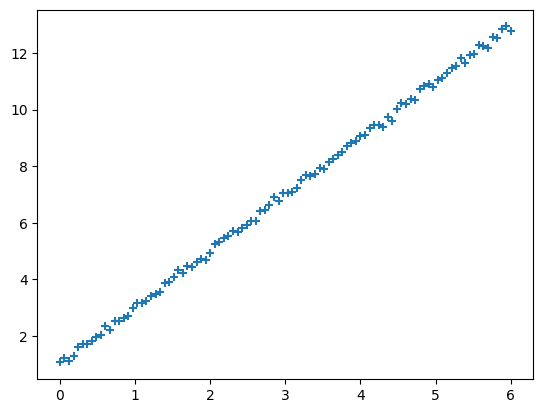

In [ ]:
X = torch.linspace(0, 6, 100, requires_grad=True)
y = 2*X +1 + 0.1*torch.randn(X.size())
plt.scatter(X.detach().numpy(), y.detach().numpy(), marker = '+')
plt.show()

# Craete Class Data

In [ ]:
class Data(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 6, 100, requires_grad=True).view(-1,1)
    self.y = 2*self.X +1 + 0.1*torch.randn(self.X.size())
    self.len = self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
    return self.len

In [ ]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

In [ ]:
def forward(X, w, b): return w*X + b
def criterion(y, y_hat): return torch.mean((y_hat - y)**2)

# Mini Batch Gradient Descent Training Loop

In [ ]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss = []
epoch_num = []
lr = 0.01
def training_model(epochs, lr, w, b):
  for epoch in range(epochs):
    e_loss = criterion(forward(X, w, b), y)
    loss.append(e_loss)
    epoch_num.append(epoch)
    if epoch%100== 0: print(f'Epoch:{epoch}, Loss: {e_loss}')

    for i, j in trainloader:
      y_hat = forward(i, w, b)
      J = criterion(y_hat, j)
      J.backward(retain_graph=True)
      with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
      w.grad.zero_()
      b.grad.zero_()

In [ ]:
training_model(1001,0.001,w, b)

Epoch:0, Loss: 4728.681640625
Epoch:100, Loss: 3.74784517288208
Epoch:200, Loss: 1.4471309185028076
Epoch:300, Loss: 0.5638653635978699
Epoch:400, Loss: 0.22415633499622345
Epoch:500, Loss: 0.09312259405851364
Epoch:600, Loss: 0.042345911264419556
Epoch:700, Loss: 0.02252608723938465
Epoch:800, Loss: 0.0147019624710083
Epoch:900, Loss: 0.011560150422155857
Epoch:1000, Loss: 0.010266648605465889


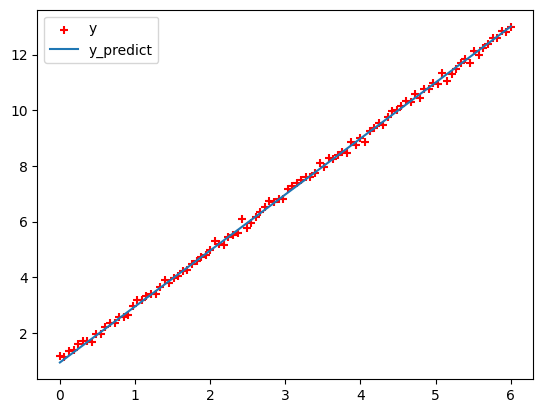

In [ ]:
y_pred = forward(X, w, b)
plt.scatter(dataset.X.detach().numpy(), dataset.y.detach().numpy(), label = 'y', marker='+', color = 'red')
plt.plot(X.detach().numpy(), y_pred.detach().numpy(), label = 'y_predict')
plt.legend()
plt.show()